In [ ]:
import requests
import time


client_id = ""
client_secret = ""
redirect_uri = "https://oauth.vk.com/blank.html"

access_token = ""
my_user_id = 0
all_people = {}
my_friends = {}

def get_friend(user_id):
    url = f"https://api.vk.com/method/friends.get?access_token={access_token}&user_id={str(user_id)}&v=5.131"
    try:
        # Выполняем запрос к API ВКонтакте
        response = requests.get(url)
        data = response.json()

        # Проверяем наличие ошибок в ответе API
        if 'error' in data:
            error_msg = data['error']['error_msg']
            print(f"Ошибка: {error_msg}")
            return

        # Получаем список друзей и выводим их
        friends = data['response']['items']
        print(f"Нашел друзей {str(user_id)}")
        my_friends[user_id] = friends

    except requests.exceptions.RequestException as e:
        print(f"Ошибка при выполнении запроса: {e}")
        return

def get_friends_by_user_id(user_id):
    # URL-адрес для вызова метода friends.get
    url = f"https://api.vk.com/method/friends.get?access_token={access_token}&user_id={str(user_id)}&v=5.131"

    try:
        # Выполняем запрос к API ВКонтакте
        response = requests.get(url)
        data = response.json()

        # Проверяем наличие ошибок в ответе API
        if 'error' in data:
            error_msg = data['error']['error_msg']
            print(f"Ошибка: {error_msg}")
            return

        # Получаем список друзей и выводим их
        friends = data['response']['items']
        print(f"Нашел друзей {str(user_id)}")
        all_people[user_id] = friends

    except requests.exceptions.RequestException as e:
        print(f"Ошибка при выполнении запроса: {e}")
        return
    
get_friend(my_user_id)

for key in my_friends:
    friends = my_friends[key]
    all_people[key] = friends
    for friend_id in friends:
        time.sleep(1) # Сон в 1 секунды
        get_friends_by_user_id(friend_id)
        
print("Закончил поиск")


Закончил добавлять в граф


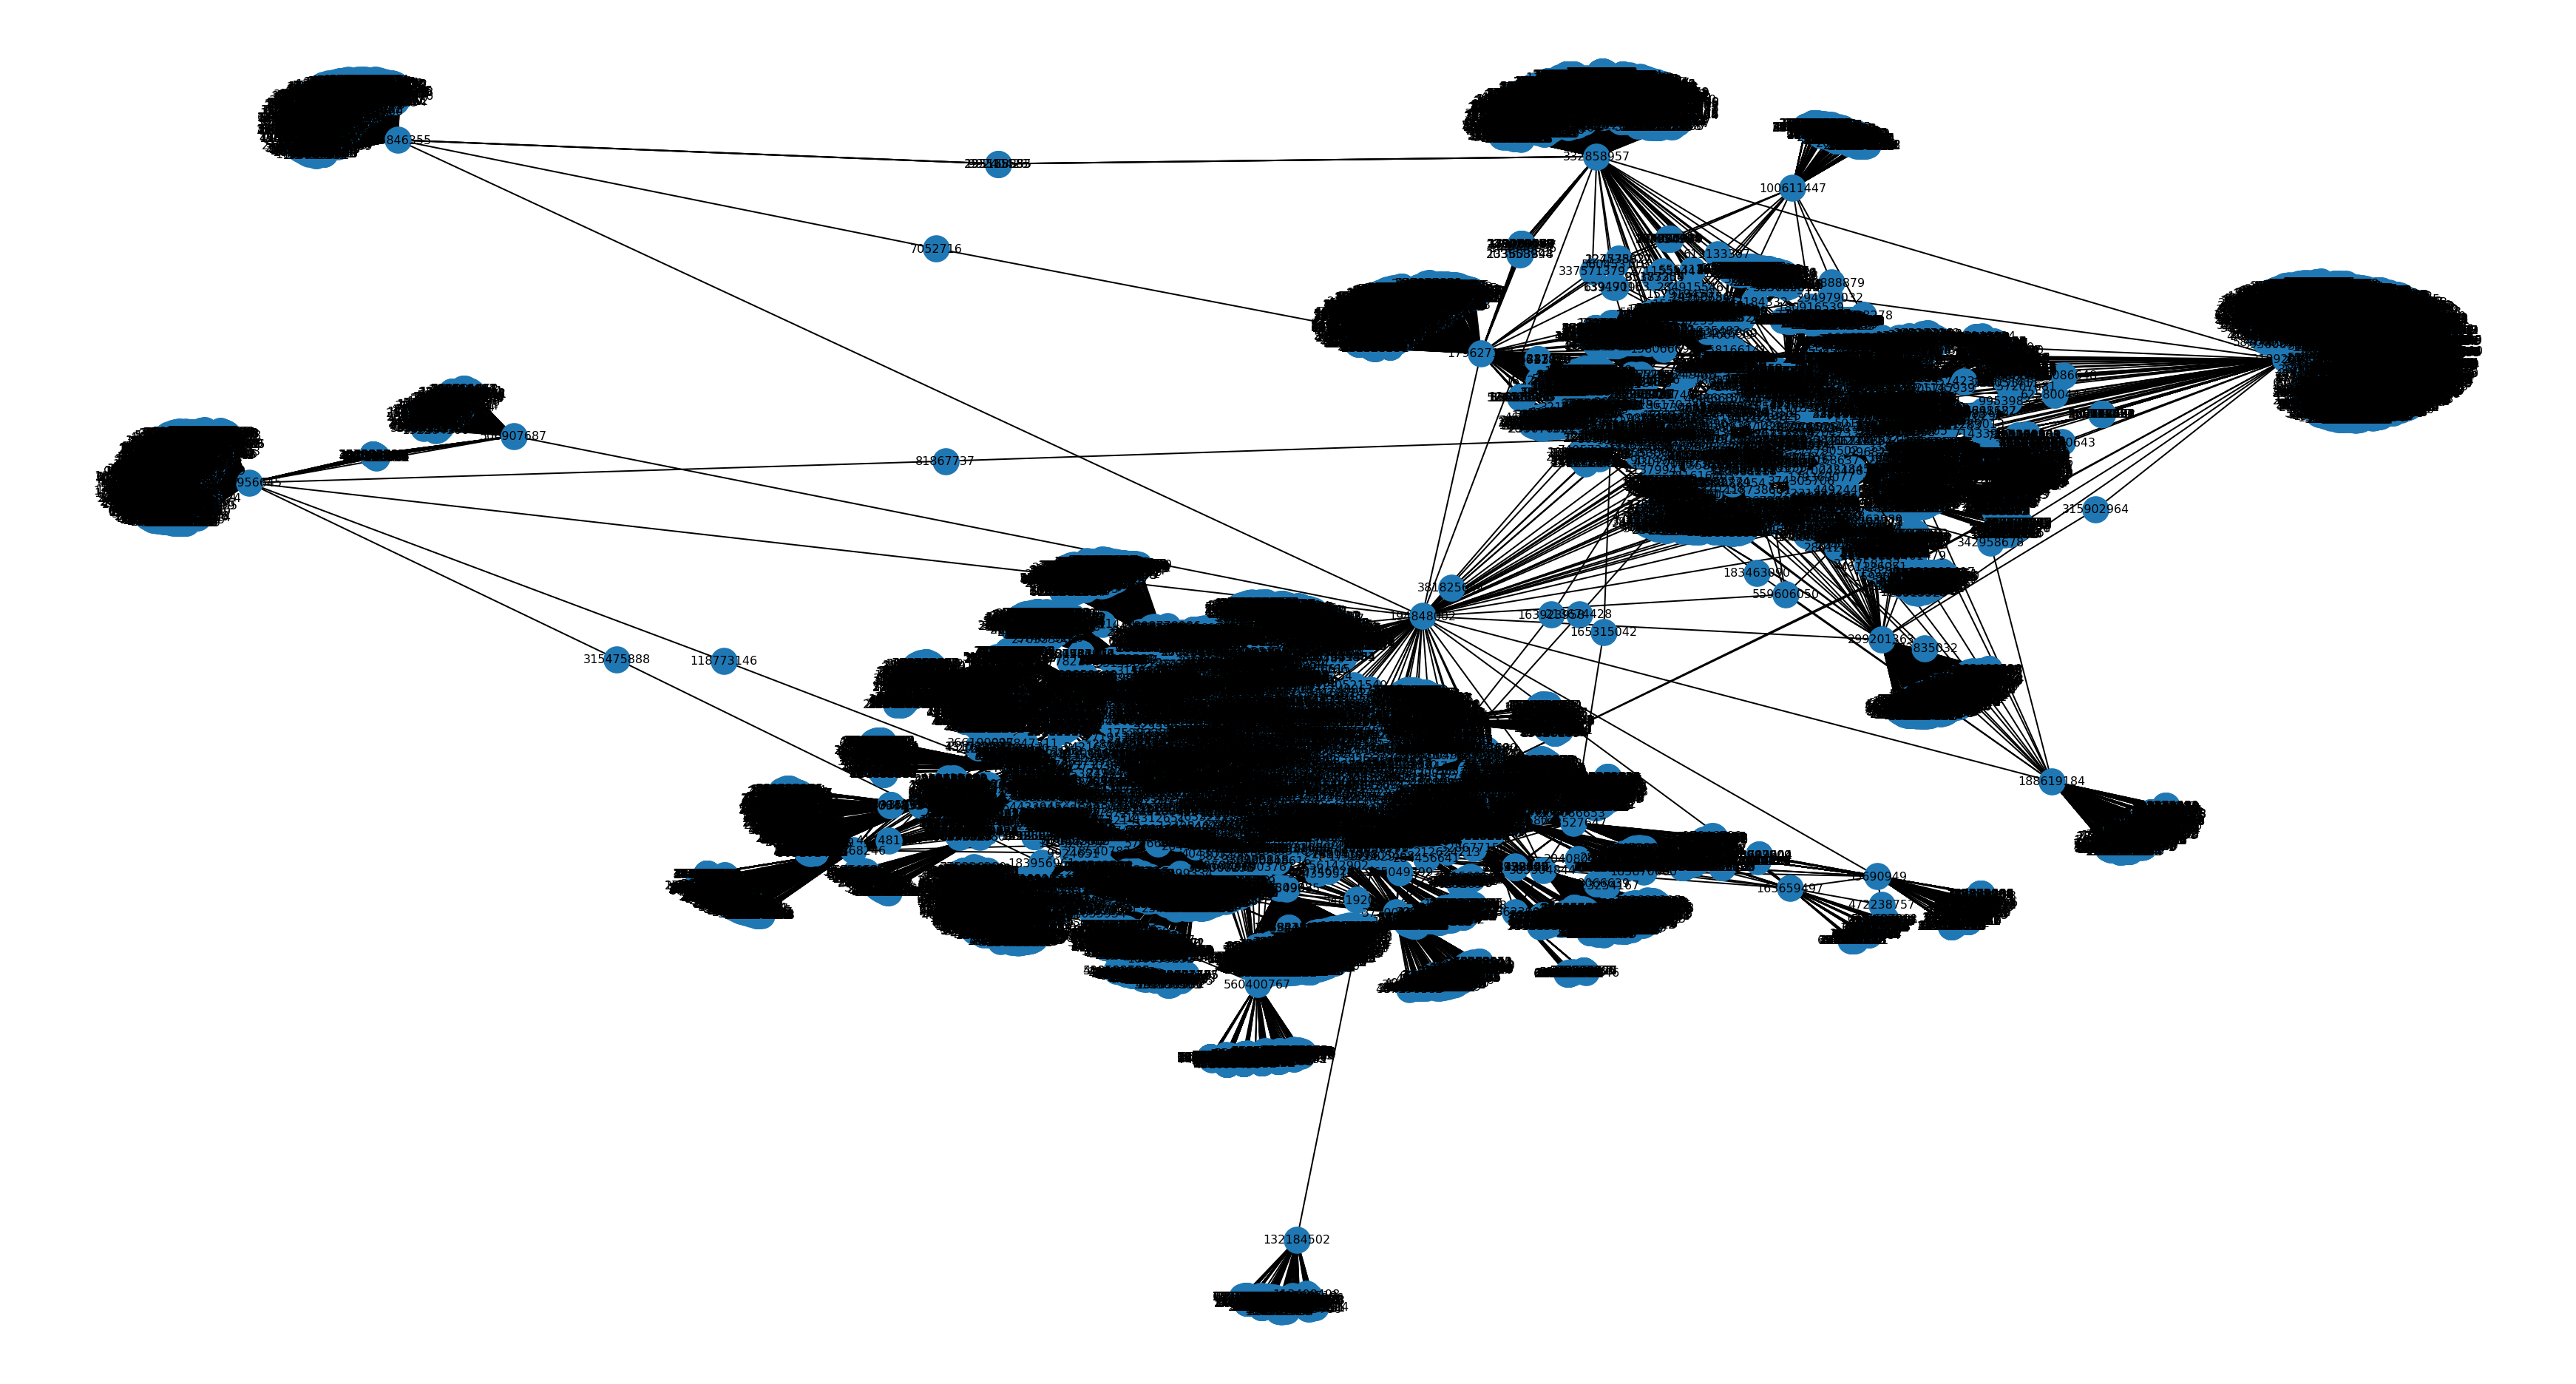

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Создаем пустой граф
G = nx.Graph()

# Добавляем узлы в граф для каждого друга
for person in all_people:
    G.add_node(person)

    # Добавляем ребра между каждым другом и его друзьями
    for friend in all_people[person]:
        G.add_edge(person, friend)

print("Закончил добавлять в граф")

# Отрисовываем граф с помощью NetworkX и Matplotlib
plt.figure(figsize=(100, 100))

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False)
nx.draw_networkx_labels(G,pos, font_size=8)
# Настройки масштаба
plt.show()
